E-Commerce Database 

In [1]:
#Import the library that we need in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default="plotly_white"

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Download Dataset from kaggle
import kagglehub
path = kagglehub.dataset_download("konstantinognev/sample-superstorecsv")
print("Path to dataset files:", path)


In [112]:
data=pd.read_csv("SampleSuperstore.csv",encoding = 'latin-1')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
#first five row using head() function it give first five row.
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
#describe() is used to get a quick statistical summary of your data 📊
'''It shows important statistics for each column.

For numeric columns, it gives:

count → number of non-null values
mean → average
std → standard deviation
min → smallest value
25% → first quartile
50% (median)
75% → third quartile
max → largest value '''

data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
# columns() function we can print all columns name in data set
print(list(data.columns))

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']


In [20]:
'''info() : is used to get a quick summary of a DataFrame
— mainly its structure and data quality or data Types'''

data.info()

<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   str    
 1   Segment       9994 non-null   str    
 2   Country       9994 non-null   str    
 3   City          9994 non-null   str    
 4   State         9994 non-null   str    
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   str    
 7   Category      9994 non-null   str    
 8   Sub-Category  9994 non-null   str    
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), str(8)
memory usage: 1015.1 KB


Sales by Category

Question 1.
You need to anlayze sales based on profuct categories 
and determine which category has the lowest sales and
which category has the highest sales.


In [39]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


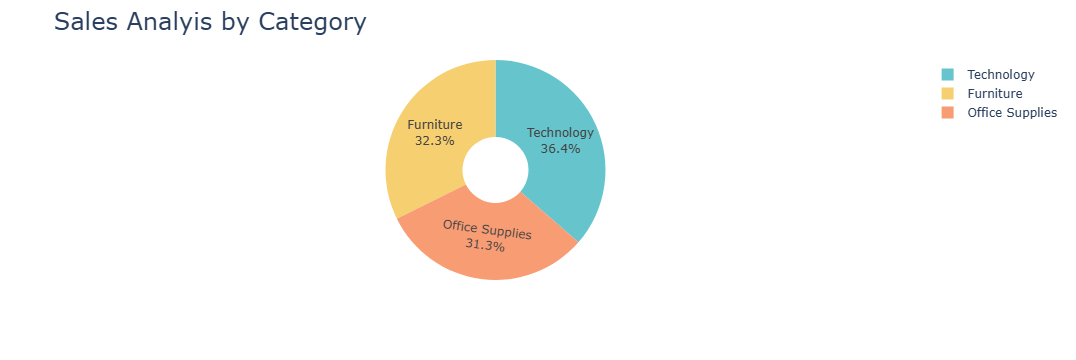

In [107]:
fig = px.pie(sales_by_category,
             values='Sales',
             names = 'Category',
             hole=0.3,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text="Sales Analyis by Category",title_font=dict(size=24))
fig.show()

Sales Analysis By Sub Categories

Question 2.
The sales analysis need to be done based on sub-categories.


In [45]:
sales_by_subcategory = data.groupby("Sub-Category")["Sales"].sum().reset_index()
sales_by_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


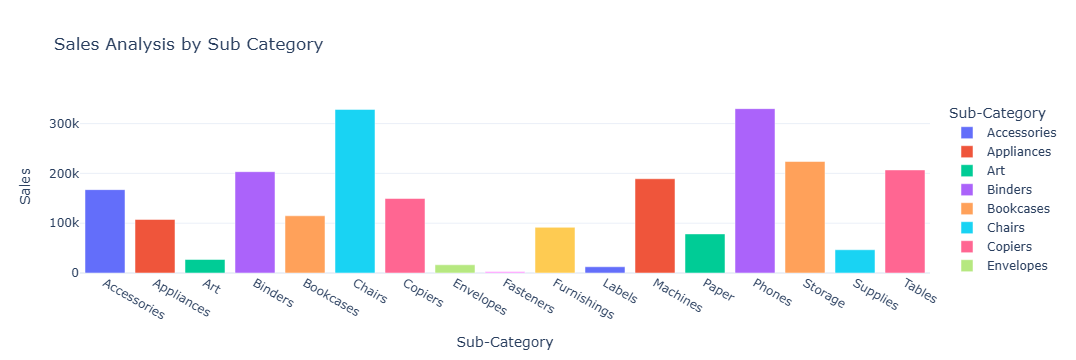

In [108]:
fig = px.bar(
    sales_by_subcategory,
    x='Sub-Category',
    y='Sales',
    color='Sub-Category', 
    title="Sales Analysis by Sub Category")
plt.

 Profit by customer segment

Question 3.
Analyze the sales and profit by customer segment

In [110]:
segment_analysis = data.groupby('Segment')[['Sales', 'Profit']].sum()
segment_analysis

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


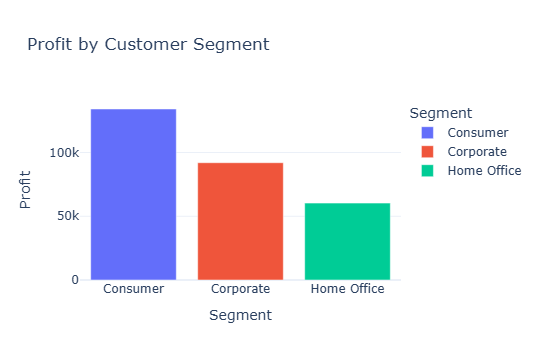

In [98]:
fig = px.bar(
    segment_analysis_reset,
    x='Segment',
    y='Profit',
    title='Profit by Customer Segment',
    color='Segment'
)
fig.show()

Sales Profit Ratio

Question 4.
Analysis the sales to profit ratio

In [103]:
segment_analysis = data.groupby('Segment')[['Sales', 'Profit']].sum()
segment_analysis['Profit_Ratio'] = segment_analysis['Profit'] / segment_analysis['Sales']
segment_analysis = segment_analysis.reset_index()
segment_analysis

,Segment,Sales,Profit,Profit_Ratio
0,Consumer,1.161401e+06,134119.2092,0.115481
1,Corporate,7.061464e+05,91979.1340,0.130255
2,Home Office,4.296531e+05,60298.6785,0.140343


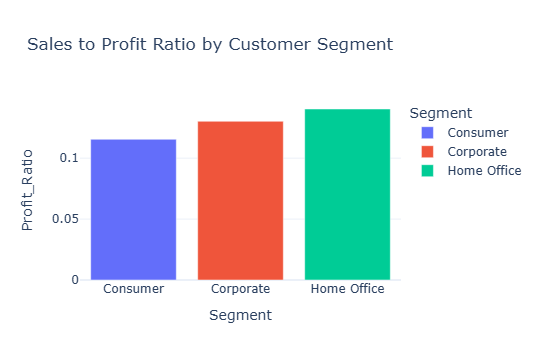

In [104]:
fig = px.bar(
    segment_analysis,
    x='Segment',
    y='Profit_Ratio',
    color='Segment',
    title='Sales to Profit Ratio by Customer Segment'
)
fig.show()